<a href="https://colab.research.google.com/github/P146737/Airline_Performance_2008_P146737/blob/main/Project2_DataManagement_P146737.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have chosen the 2008 Airline dataset to explore on the airline on-time performance. This project aims to analyse the delay patterns of flights in year 2008. I have used hive for data processing and Python for data visualization.

In [ ]:
    > CREATE EXTERNAL TABLE airline_2008 (
    >   Year INT,
    >   Month INT,
    >   DayofMonth INT,
    >   DayOfWeek INT,
    >   DepTime INT,
    >   CRSDepTime INT,
    >   ArrTime INT,
    >   CRSArrTime INT,
    >   UniqueCarrier STRING,
    >   FlightNum INT,
    >   TailNum STRING,
    >   ActualElapsedTime INT,
    >   CRSElapsedTime INT,
    >   AirTime INT,
    >   ArrDelay INT,
    >   DepDelay INT,
    >   Origin STRING,
    >   Dest STRING,
    >   Distance INT,
    >   TaxiIn INT,
    >   TaxiOut INT,
    >   Cancelled INT,
    >   CancellationCode STRING,
    >   Diverted INT,
    >   CarrierDelay INT,
    >   WeatherDelay INT,
    >   NASDelay INT,
    >   SecurityDelay INT,
    >   LateAircraftDelay INT
    > )
    > ROW FORMAT DELIMITED
    > FIELDS TERMINATED BY ','
    > STORED AS TEXTFILE
    > LOCATION '/user/pavethraavadiar/airline_2008/';
OK

The table above was created to store the original dataset without header for better analysis in Hive.

In [ ]:
SELECT * FROM airline_2008 LIMIT 5;

In [ ]:
2008	1	3	4	1343	1325	1451	1435	WN	588	N240WN	68	70	55	16	18	HOU	LIT	393	4	16	0	0	0	0
2008	1	3	4	1125	1120	1247	1245	WN	1343	N523SW	82	85	71	2	5	HOU	MAF	441	3	NULL	NULL	NULL	NULL	NULL
2008	1	3	4	2009	2015	2136	2140	WN	3841	N280WN	87	85	71	-4	-6	HOU	MAF	441	2	14	0		0	NULL	NULL	NULL	NULL	NULL
2008	1	3	4	903	855	1203	1205	WN	3	N308SA	120	130	108	-2	8	HOU	MCO	848	5	NULL	NULL	NULL	NULL	NULL
2008	1	3	4	1423	1400	1726	1710	WN	25	N462WN	123	130	107	16	23	HOU	MCO	848	6	10	0		0	16	0	0	0	0

From the above, we can see the top 5 rows of the original dataset.

In [ ]:
SELECT COUNT(*) FROM airline_2008;

In [ ]:
2389217

Based on the above output, it's evident that there are 2,389,217 rows in the dataset.

In [ ]:
CREATE TABLE airline_2008_cleaned AS
SELECT
  Year,
  Month,
  DayofMonth,
  DayOfWeek,
  CASE WHEN DepTime = 'NA' THEN NULL ELSE CAST(DepTime AS INT) END AS DepTime,
  CRSDepTime,
  CASE WHEN ArrTime = 'NA' THEN NULL ELSE CAST(ArrTime AS INT) END AS ArrTime,
  CRSArrTime,
  UniqueCarrier,
  FlightNum,
  CASE WHEN TailNum = '' THEN NULL ELSE TailNum END AS TailNum,
  CASE WHEN ActualElapsedTime = 'NA' THEN NULL ELSE CAST(ActualElapsedTime AS INT) END AS ActualElapsedTime,
  CASE WHEN CRSElapsedTime = 'NA' THEN NULL ELSE CAST(CRSElapsedTime AS INT) END AS CRSElapsedTime,
  CASE WHEN AirTime = 'NA' THEN NULL ELSE CAST(AirTime AS INT) END AS AirTime,
  CASE WHEN ArrDelay = 'NA' THEN NULL ELSE CAST(ArrDelay AS INT) END AS ArrDelay,
  CASE WHEN DepDelay = 'NA' THEN NULL ELSE CAST(DepDelay AS INT) END AS DepDelay,
  Origin,
  Dest,
  Distance,
  CASE WHEN TaxiIn = 'NA' THEN NULL ELSE CAST(TaxiIn AS INT) END AS TaxiIn,
  CASE WHEN TaxiOut = 'NA' THEN NULL ELSE CAST(TaxiOut AS INT) END AS TaxiOut,
  Cancelled,
  CancellationCode,
  Diverted,
  CASE WHEN CarrierDelay = 'NA' THEN NULL ELSE CAST(CarrierDelay AS INT) END AS CarrierDelay,
  CASE WHEN WeatherDelay = 'NA' THEN NULL ELSE CAST(WeatherDelay AS INT) END AS WeatherDelay,
  CASE WHEN NASDelay = 'NA' THEN NULL ELSE CAST(NASDelay AS INT) END AS NASDelay,
  CASE WHEN SecurityDelay = 'NA' THEN NULL ELSE CAST(SecurityDelay AS INT) END AS SecurityDelay,
  CASE WHEN LateAircraftDelay = 'NA' THEN NULL ELSE CAST(LateAircraftDelay AS INT) END AS LateAircraftDelay
FROM airline_2008;

The above table was created to keep all rows and treat 'NA' values and blank fields as Null in Hive.

In [ ]:
SELECT COUNT(*) FROM airline_2008_cleaned WHERE Cancelled = 1;

In [ ]:
64442

The above verifies the number of cancelled flights in the dataset.

In [ ]:
SELECT COUNT(*) FROM airline_2008_cleaned WHERE DepTime IS NULL;

In [ ]:
64442

The above veries the number of rows with missing DepTime, represented as actual departure time in local timing (hhmm).

In [ ]:
SELECT AVG(ArrDelay) FROM airline_2008_cleaned WHERE ArrDelay IS NOT NULL;

In [ ]:
10.27356916693868

The average arrival delay for all non-null ArrDelay is 10.27minutes. This also means that in average, flights in 2008 arrived about 10.27 minutes late.

In [ ]:
SELECT
  COUNT(*) AS total_rows,
  COUNT(DISTINCT
    Year, Month, DayofMonth, DayOfWeek, DepTime, CRSDepTime,
    ArrTime, CRSArrTime, UniqueCarrier, FlightNum, TailNum,
    ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay,
    Origin, Dest, Distance, TaxiIn, TaxiOut, Cancelled,
    CancellationCode, Diverted, CarrierDelay, WeatherDelay,
    NASDelay, SecurityDelay, LateAircraftDelay
  ) AS distinct_rows
FROM airline_2008_cleaned;

In [ ]:
2008	2	28	4	829	835	1341	1350	F9	728	N201FR	192	195	172	-9	-6	DEN	DCA	1476	6	14	0		0	NULL	NULL	NULL	NULL	NULL	2
2008	2	28	4	1427	1435	1640	1636	F9	727	N201FR	253	241	228	4	-8	DCA	DEN	1476	9	16	0		0	NULL	NULL	NULL	NULL	NULL	2
2008	2	28	4	1854	1807	1946	1902	F9	773	N201FR	112	115	91	44	47	DEN	LAS	629	8	13	0		0	44	0	0	0	0	2
2008	2	28	4	2027	1942	2314	2229	F9	780	N201FR	107	107	84	45	45	LAS	DEN	629	10	13	0		0	1	0	44	0	0	2

The above is to check if there's any duplicates present in the dataset. Based on the output, each of the 4 rows above has duplicate count of 2, which clearly means those exact rows appear twice in the dataset.

In [ ]:
CREATE TABLE airline_2008_deduplicated AS
SELECT DISTINCT *
FROM airline_2008_cleaned;

The above command creates a new table by removing the fully duplicated rows and keeping only the unique rows.

In [ ]:
SELECT COUNT(*) FROM airline_2008_deduplicated;

In [ ]:
2389213

Then, we checked on the number of rows in the new table after duplicates were removed. It can be seen that 4 of the duplicate rows were removed indicating it is as expected as it matches the 4 rows shown earlier. Previously, the total number of rows were 2,389,217 and now it has reduced by 4.

In [ ]:
SELECT
  COUNT(*) AS total_rows,
  COUNT(*) - COUNT(Year) AS year_nulls,
  COUNT(*) - COUNT(FlightNum) AS flightnum_nulls,
  COUNT(*) - COUNT(Origin) AS origin_nulls,
  COUNT(*) - COUNT(Dest) AS dest_nulls
FROM airline_2008_deduplicated;

In [ ]:
2389213	0	0	0	0

Then, we checked for nulls or missing values in key columns which shows that there's none.

In [ ]:
SELECT
  Cancelled,
  CancellationCode,
  COUNT(*) AS count
FROM airline_2008_deduplicated
GROUP BY Cancelled, CancellationCode
ORDER BY Cancelled;

In [ ]:
0		2324771
1	D	6
1	C	12617
1	B	25744
1	A	26075

The above is performed to check categorical consistency. It can be seen that most of the flights were not cancelled, and there are 4 unique representations of the cancellation code if the flight was cancelled. Therefore, cancellations are property retained in the dataset.

#Question 1 - Delay Patterns

**What times of day (morning/afternoon/evening) have the lowest average delays?**

In [ ]:
SELECT
  CASE
    WHEN CAST(CRSDepTime/100 AS INT) BETWEEN 5 AND 11 THEN 'Morning'
    WHEN CAST(CRSDepTime/100 AS INT) BETWEEN 12 AND 16 THEN 'Afternoon'
    WHEN CAST(CRSDepTime/100 AS INT) BETWEEN 17 AND 20 THEN 'Evening'
    ELSE 'Night'
  END AS TimeOfDay,
  AVG(DepDelay) AS AvgDepDelay,
  AVG(ArrDelay) AS AvgArrDelay
FROM airline_2008_deduplicated
WHERE Cancelled = 0
GROUP BY
  CASE
    WHEN CAST(CRSDepTime/100 AS INT) BETWEEN 5 AND 11 THEN 'Morning'
    WHEN CAST(CRSDepTime/100 AS INT) BETWEEN 12 AND 16 THEN 'Afternoon'
    WHEN CAST(CRSDepTime/100 AS INT) BETWEEN 17 AND 20 THEN 'Evening'
    ELSE 'Night'
  END;

In [ ]:
Afternoon	13.827874638969499	12.440749529071182
Evening	17.68378167618581	15.910322570586676
Morning	5.885611225055898	5.373684044167229
Night	13.953962275824201	11.674937234603105

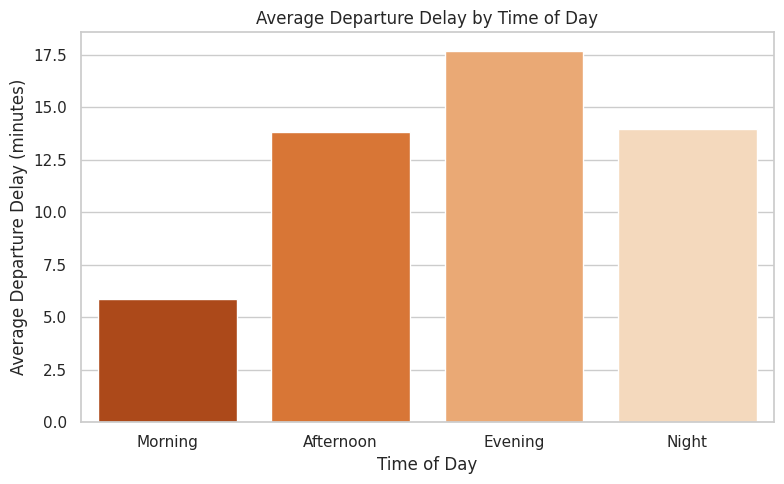

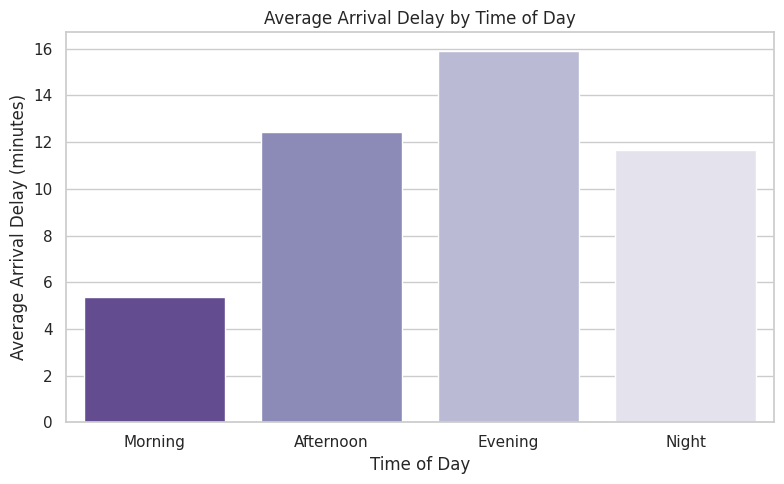

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#create data frame
timedata={
    'TimeOfDay': ['Morning','Afternoon','Evening','Night'],
    'AvgDepDelay': [5.885611225055898,13.827874638969499,17.68378167618581,
                    13.95396227582420],
    'AvgArrDelay': [5.373684044167229,12.440749529071182,15.910322570586676,
                    11.674937234603105]
}
dftime=pd.DataFrame(timedata)

#set plot style
sns.set(style='whitegrid')

#plot 1
plt.figure(figsize=(8,5))
sns.barplot(x='TimeOfDay',y='AvgDepDelay',data=dftime,hue='TimeOfDay',palette='Oranges_r')
plt.title('Average Departure Delay by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Departure Delay (minutes)')
plt.tight_layout()
plt.show()

#plot 2
plt.figure(figsize=(8,5))
sns.barplot(x='TimeOfDay',y='AvgArrDelay',data=dftime,hue='TimeOfDay',palette='Purples_r')
plt.title('Average Arrival Delay by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

First, I have bucketed CRSDepTime which represents scheduled departure time in minutes, into morning (5AM-11.59AM), afternoon (12PM-4.59PM), evening (5PM-8.59PM), and night (9PM-4.59AM). Based on the Hive analysis above, we can see that the second column represents the average depature delay in minutes and the third represents the average arrival delay in minutes. Based on the bar plot above, it is evident that morning flights have the lowest average departure and arrival delays, indicating it's the best time to travel for punctuality.

**Which days of the week show better on-time performance?**

In [ ]:
SELECT
  DayOfWeek,
  AVG(DepDelay) AS AvgDepDelay,
  AVG(ArrDelay) AS AvgArrDelay
FROM airline_2008_deduplicated
WHERE Cancelled = 0
GROUP BY DayOfWeek
ORDER BY DayOfWeek;

In [ ]:
1	11.83080499974889	10.7363841520118
2	11.194130814950116	10.584612316966389
3	9.39014550041105	7.776016701696971
4	10.99878883854602	10.248865002101033
5	14.768929215103846	14.63059434458856
6	10.001837465857898	7.509435170331058
7	11.750415286260312	10.066515438639072

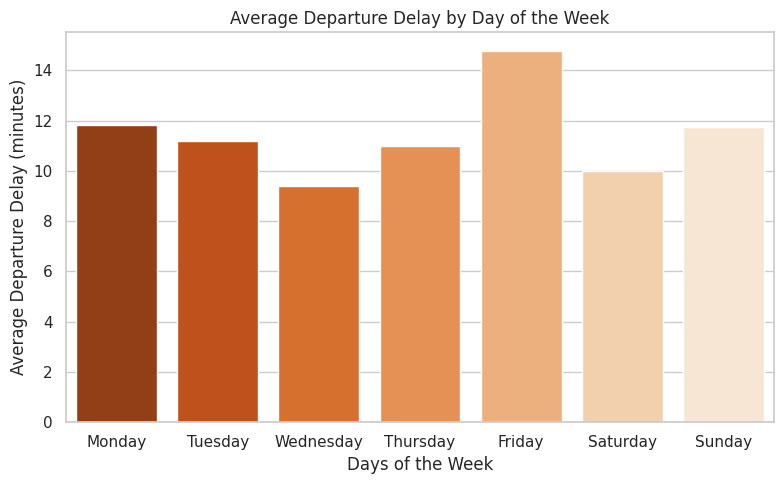

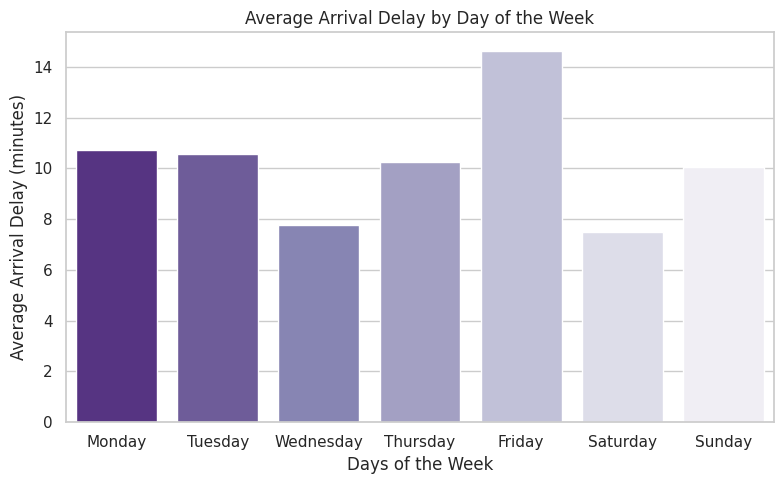

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#create data frame
daydata={
    'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'AvgDepDelay': [11.83080499974889,11.194130814950116,9.3901455004105,10.99878883854602,
                    14.768929215103846,10.001837465857898,11.750415286260312],
    'AvgArrDelay': [10.7363841520118,10.584612316966389,7.776016701696971,10.248865002101033,
                    14.63059434458856,7.509435170331058,10.066515438639072]
}

dfday=pd.DataFrame(daydata)

#set plot style
sns.set(style='whitegrid')

#plot 1
plt.figure(figsize=(8,5))
sns.barplot(x='day',y='AvgDepDelay',data=dfday,hue='day',palette='Oranges_r')
plt.title('Average Departure Delay by Day of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Average Departure Delay (minutes)')
plt.tight_layout()
plt.show()

#plot 2
plt.figure(figsize=(8,5))
sns.barplot(x='day',y='AvgArrDelay',data=dfday,hue='day',palette='Purples_r')
plt.title('Average Arrival Delay by Day of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Average Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

From the above output, it can be seen that Fridays (denoted as 5 in Hive analysis) has the highest delays, possibly due to high passenger volumes heading into the weekend. On the other hand, Wednesdays (denoted as 3 in Hive analysis) and Saturdays (denoted as 6 in Hive analysis) has the lowest average delays in terms of departure and arrival, making them ideal for on-time travel. This insight can help passengers plan better travel days and assist airlines in targeting schedule optimisation on high-delay days.

**During which months or seasons are flights most likely to be on time?**

In [ ]:
SELECT DISTINCT Month FROM airline_2008_deduplicated
WHERE Cancelled = 0
ORDER BY Month;

In [ ]:
1
2
3
4

From the above output, we can see that this dataset only consists of 4 months, January till April. Therefore, we will not be able to compare the seasons but we can comment on the months.

In [ ]:
SELECT
  Month,
  AVG(DepDelay) AS AvgDepDelay,
  AVG(ArrDelay) AS AvgArrDelay
FROM airline_2008_deduplicated
WHERE Cancelled = 0
GROUP BY Month
ORDER BY Month;

In [ ]:
1	11.47609595943289	10.188855960349496
2	13.706184063750829	13.07777905767012
3	12.49126948010275	11.19236458018227
4	8.201132754082797	6.807297481094145

From the output above, we can see that the most delayed flights are in February for both departure as well as arrival. We can observe a downward trend in delay from February to April. April shows the lowest delay, possibly due to improved weather and fewer disruptions. Therefore, April flights are most likely to be on time. Based on the Cancellation analysis at the bottom, April records the lowest cancellations showing minimal disruptions. In addition, April is early spring season in the U.S., marking more stable weather compared to January and February known for snowstorms due to Winter season.

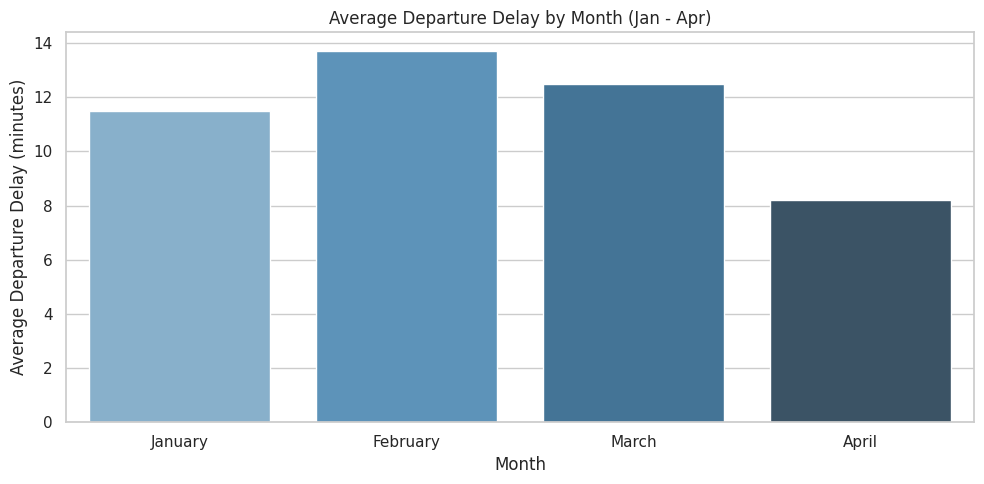

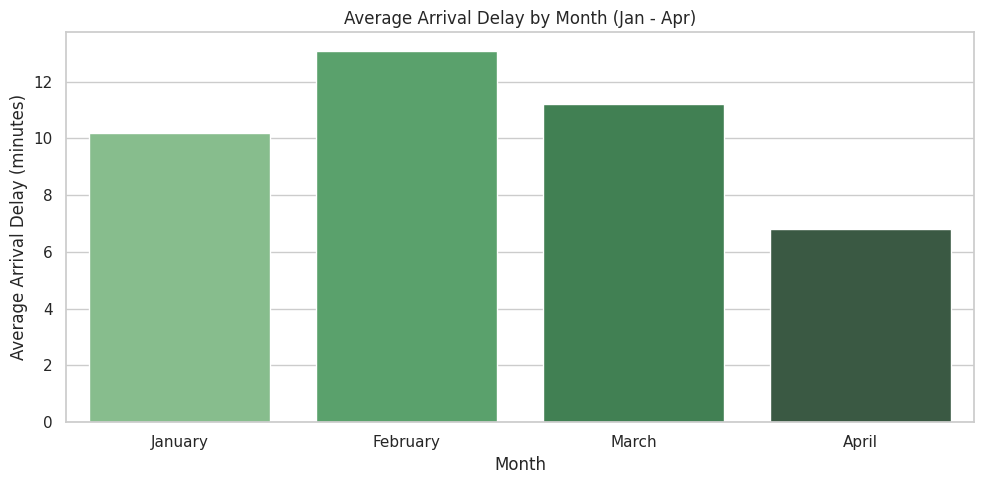

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#create data frame
data={
    'Month': ["January","February","March","April"],
    'AvgDepDelay': [11.47609595943289,13.706184063750829,12.49126948010275,
                    8.201132754082797],
    'AvgArrDelay': [10.188855960349496,13.07777905767012,11.192364580,
                    6.807297481094145]
}
df=pd.DataFrame(data)

#set plot style
sns.set(style='whitegrid')

#plot 1
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='AvgDepDelay',hue='Month',data=df,palette='Blues_d')
plt.title('Average Departure Delay by Month (Jan - Apr)')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.tight_layout()
plt.show()

#plot 2
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='AvgArrDelay',hue='Month',data=df,palette='Greens_d')
plt.title('Average Arrival Delay by Month (Jan - Apr)')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

From the visualization above, we can again confirm that the flights in the month April are most likely to be on time compared to the other 3 months of the year.

Thus, passengers aiming to avoid delays should consider travelling in morning flights in the month of April and not from January to March. They should also consider travelling during Wednesdays and Saturdays to avoid delays.

#Question 2 - Delay Factors

**Identify and rank the top 3-5 factors contributing to flight delays, based on the delay categories provided in the dataset.**

In [ ]:
SELECT
    SUM(CarrierDelay) AS TotalCarrierDelay,
    SUM(WeatherDelay) AS TotalWeatherDelay,
    SUM(NASDelay) AS TotalNASDelay,
    SUM(SecurityDelay) AS TotalSecurityDelay,
    SUM(LateAircraftDelay) AS TotalLateAircraftDelay
FROM airline_2008_deduplicated
WHERE Cancelled = 0;

In [ ]:
9208866	1717647	9445918	47035	12262628

The above output gives the total delay in minutes for each of the delay category. It's evident that the top factor contributing to flight delays is late aircraft, followed by National Airspace System (hereafter referred to as "NAS"),then, carrier, and finally, weather and security.

In [ ]:
import pandas as pd
delay_data={
    'DelayCause': ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'],
    'DelayMinutes': [9208866,1717647,9445918,47035,12262628]
}
df_delay=pd.DataFrame(delay_data)

#add percentage column
total_delay=df_delay['DelayMinutes'].sum()
df_delay['Percentage']=(df_delay['DelayMinutes']/total_delay)*100
df_delay=df_delay.sort_values(by='DelayMinutes',ascending=False)
df_delay

DelayCause  DelayMinutes  Percentage
4  LateAircraftDelay      12262628   37.520937
2           NASDelay       9445918   28.902426
0       CarrierDelay       9208866   28.177099
1       WeatherDelay       1717647    5.255621
3      SecurityDelay         47035    0.143917

From the above table, it's evident that Late Aircraft Delay is the largest contributor, causing 12.26million minutes of delay in the year 2008. This is 37.5% of the all delay minutes. This proves that turnaround time and prior flight delays affect schedule reliability. NAS Delay accounts for 9.45 million minutes which makes up to 28.9% of delays. According to the Federal Register, these may include airspace congestion or airport operations (https://www.federalregister.gov/documents/2002/11/25/02-29910/reporting-the-causes-of-airline-delays-and-cancellations). Carrier Delay takes up 28.2% of delays which is equivalent to 9.2million minutes. As per Federal Aviation Administration, this could also be due to airline internal problems, like crew, maintenance, or loading delay (https://aspm.faa.gov/aspmhelp/index/Types_of_Delay.html). Weather delay also causes 5.3% of delays which is similar to 1.7million minutes of delay. This is lower than expected and indicates that weather was a less dominant factor in year 2008. Finally, Security delay was negligible at 0.14% which shows that this factor has minimal impact in total delay time.  

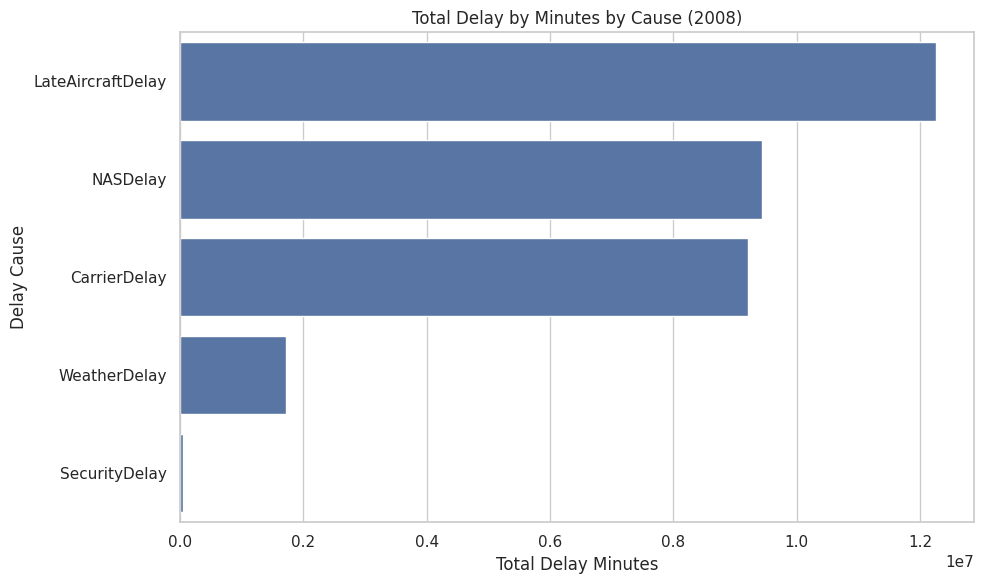

In [ ]:
#plot barplot
plt.figure(figsize=(10,6))
sns.barplot(x='DelayMinutes',y='DelayCause',data=df_delay,legend=False)
plt.title('Total Delay by Minutes by Cause (2008)')
plt.xlabel('Total Delay Minutes')
plt.ylabel('Delay Cause')
plt.tight_layout()
plt.show()

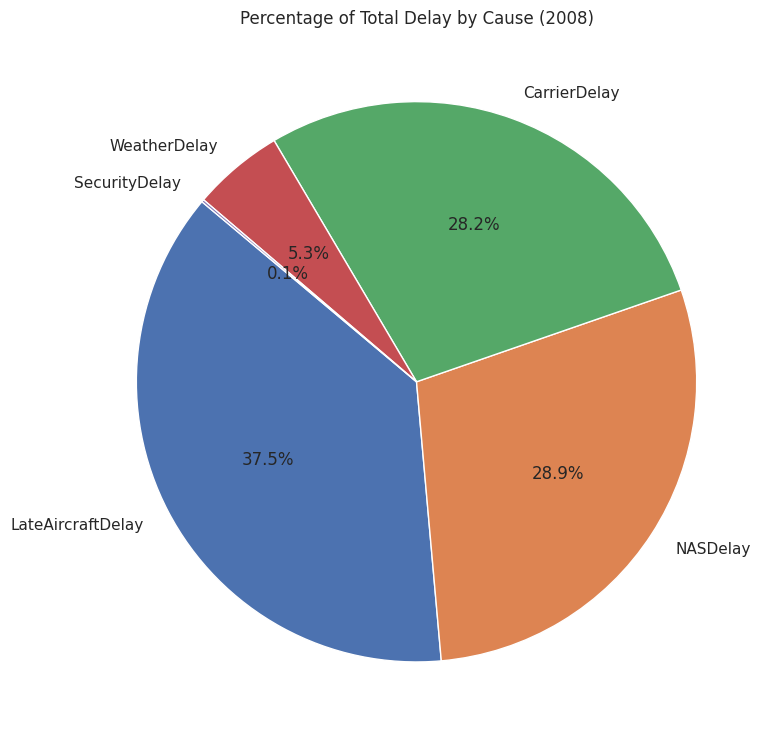

In [ ]:
#plot pie chart
plt.figure(figsize=(8,8))
plt.pie(df_delay['Percentage'],labels=df_delay['DelayCause'],autopct='%1.1f%%',startangle=140)
plt.title('Percentage of Total Delay by Cause (2008)')
plt.tight_layout()
plt.show()

The above visualizations also clearly show that the top factor contributing to flight delay is late aircraft, followed by NAS, and then carrier, then finally would be weather and security. Based on the previous question, total delay time observed in arrival and departure is the outcome of underlying causes like late aircraft, NAS, carrier, weather and security. Based on the above pie chart, we can see that the biggest contributors are late aircraft and NAS, which aligns with the high average departure delays observed in February and March.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Correct path to your file
file_path = '/content/drive/MyDrive/delay_export.csv'

# Optional: If the file has no header
cols = ['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df = pd.read_csv(file_path, header=None, names=cols)

# Preview
df.head()


DepDelay ArrDelay CarrierDelay WeatherDelay NASDelay SecurityDelay  \
0       251      233          151            0        0             0   
1       146      137           51            0        0             0   
2        67       60            0            0        0             0   
3         7       -3           \N           \N       \N            \N   
4         7       41            7            0       34             0   

  LateAircraftDelay  
0                82  
1                86  
2                60  
3                \N  
4                 0

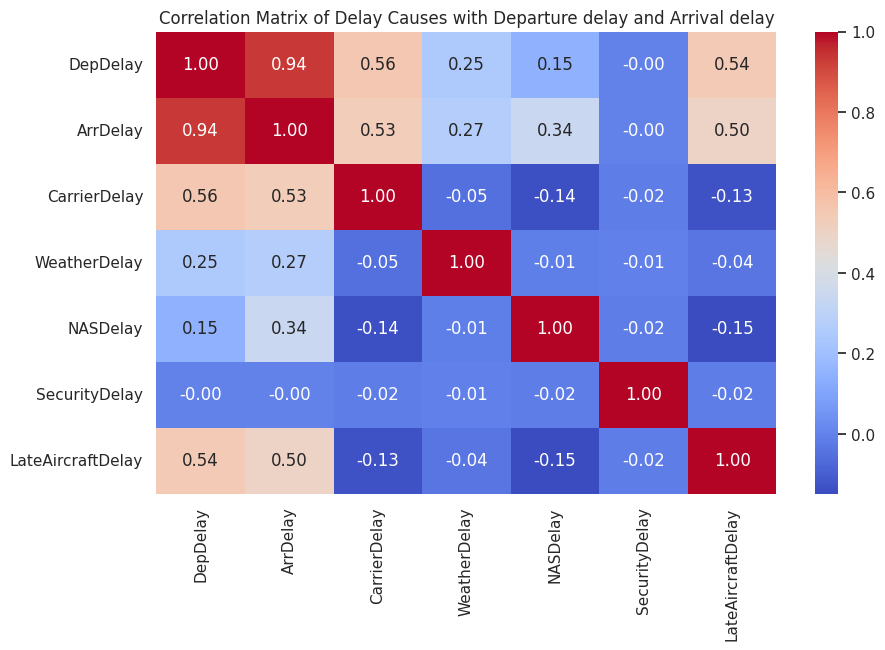

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace '\\N' with actual NaN
df.replace('\\N', np.nan, inplace=True)

# Convert all columns to numeric (skip if already numeric)
df = df.apply(pd.to_numeric, errors='coerce')

# Now drop rows with NaN (optional: you can also fillna if preferred)
df.dropna(inplace=True)

#compute correlation matrix
corr_matrix=df.corr()

#display matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of Delay Causes with Departure delay and Arrival delay')
plt.show()

From the above correlation matrix, it's clear that departure delay and arrival delay are strongly tied to each other. Both departure and arrival delay are highly correlated with carrier delay, followed by late aircraft, then weather and then NAS. Security delay has almost no relationship with departure and arrival delay. This shows that internal airline issues are a leading cause of delay and improving internal processes could provide system-wide improvement.

#Question 3 - Cancellation Analysis

**Primary reasons for flight cancellations as categorized in the dataset**

In [ ]:
SELECT CancellationCode, COUNT(*) AS total_cancelled
FROM airline_2008_deduplicated
WHERE Cancelled = 1
GROUP BY CancellationCode
ORDER BY total_cancelled DESC;

In [ ]:
A	26075
B	25744
C	12617
D	6

From the above Hive output, we can see that the most common reasons for flight cancellations are carrier and weather issues. The number of flights cancellation due to these 2 reasons are significantly high. The number of flights cancellation caused by NAS is also moderately high but not as significant as carrier and weather. However, number of cancelled flights due to security issues are extremely low and could be said is not the primary reason for flight cancellation. This suggests that the primary reasons for flight cancellations are operation and weather issues.

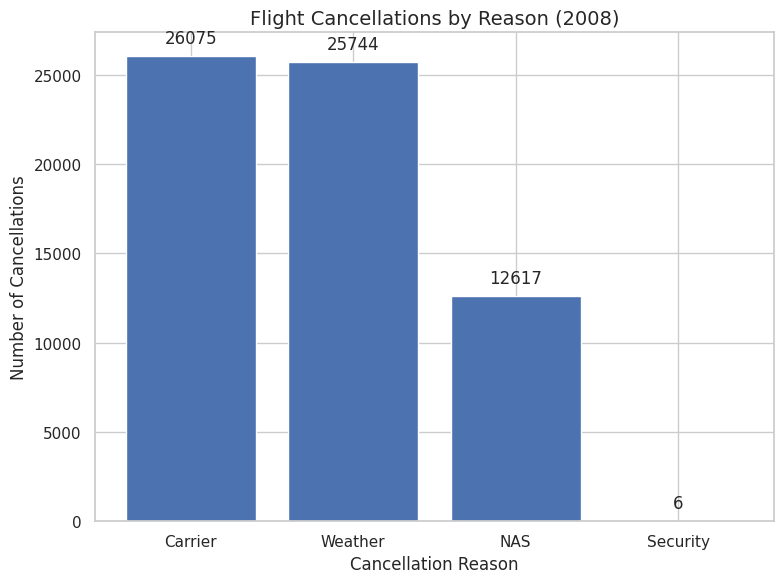

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


#create data frame
df_cancel=pd.DataFrame({
    'Reason':['Carrier', 'Weather', 'NAS', 'Security'],
    'TotalCancelled': [26075, 25744, 12617, 6]

})

plt.figure(figsize=(8,6))
bars=plt.bar(df_cancel['Reason'],df_cancel['TotalCancelled'])
plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Cancellations')
plt.title('Flight Cancellations by Reason (2008)',fontsize=14)

#add value labels
for bar in bars:
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval+500,f'{yval}',ha='center',
             va='bottom',fontsize=12)

plt.tight_layout()
plt.show()


The visualization above also supports that the primary reasons for flight cancellation are carrier recording 26,075 flights cancellation in 2008, followed by weather, recording 25,744 flights in 2008, and NAS recording 12,617. Flight cancellations due to security reasons were extremely rare and recorded a total of 6 flights only in year 2008.

**Determine if cancellations correlate with specific airlines, airports, or time periods**

* Airline cancellation

In [ ]:
SELECT UniqueCarrier, COUNT(*) AS cancelled_flights
FROM airline_2008_deduplicated
WHERE Cancelled = 1
GROUP BY UniqueCarrier
ORDER BY cancelled_flights DESC;

In [ ]:
AA	10784
MQ	8960
OO	6773
YV	5150
UA	4616
WN	4380
9E	4097
XE	3925
DL	3051
OH	2618
US	2390
EV	2346
NW	1407
CO	1084
FL	903
B6	902
AS	804
HA	112
F9	98
AQ	42

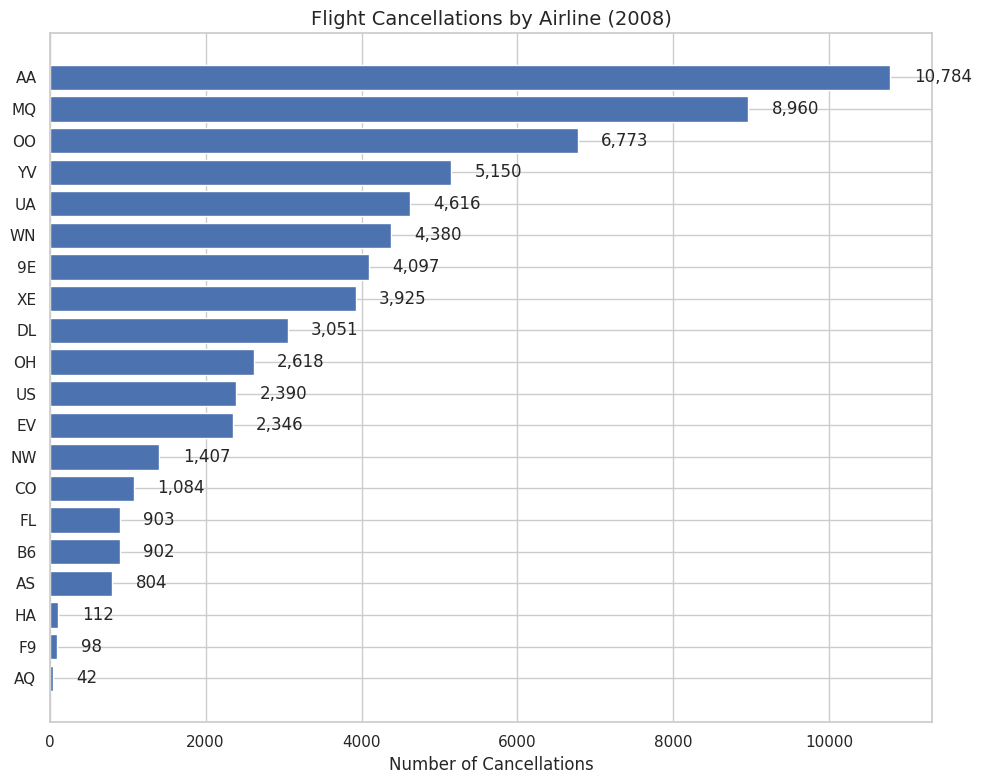

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


#create data frame
data_airline_cancel={
    'Airline':['AA','MQ','OO','YV','UA','WN','9E','XE','DL','OH','US','EV','NW',
               'CO','FL','B6','AS','HA','F9','AQ'],
    'TotalCancelled': [10784, 8960, 6773, 5150, 4616, 4380, 4097, 3925, 3051,
                       2618, 2390, 2346, 1407, 1084, 903, 902, 804, 112, 98, 42]

}
df_airlinecancel=pd.DataFrame(data_airline_cancel)
df_airlinecancel=df_airlinecancel.sort_values(by='TotalCancelled',ascending=False)

plt.figure(figsize=(10,8))
bars=plt.barh(df_airlinecancel['Airline'],df_airlinecancel['TotalCancelled'])
plt.xlabel('Number of Cancellations')
plt.title('Flight Cancellations by Airline (2008)',fontsize=14)
plt.gca().invert_yaxis() #largest will be on top

#add value labels
for bar in bars:
    plt.text(bar.get_width()+300,bar.get_y()+bar.get_height()/2,
             f'{bar.get_width():,}',va='center',fontsize=12)

plt.tight_layout()
plt.show()


From the above hive output and horizontal bar plot, we can see that American Airlines (AA) had the highest number of cancellations in 2008 recording a total of 10,784, followed by American Eagle(MQ), and Skywest Airlines(OO) (https://cga.msu.edu/PL/Portal/347/USFlagAirCarriers). Regional carries like YV and MQ are also among the top 5. This shows that regional routes are vulnerable to disruptions. On the other end, Frontier (F9) and Aloha Airlines(AQ) had recorded number of cancellations fewer than 100. (https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States), (https://en.wikipedia.org/wiki/Aloha_Airlines)

* Airports cancellation

In [ ]:
SELECT Origin, COUNT(*) AS cancelled_flights
FROM airline_2008_deduplicated
WHERE Cancelled = 1
GROUP BY Origin
ORDER BY cancelled_flights DESC
LIMIT 10;

In [ ]:
ORD	8526
DFW	4266
ATL	2825
LGA	2462
EWR	1932
DTW	1416
BOS	1409
SFO	1355
LAX	1252
DEN	1208

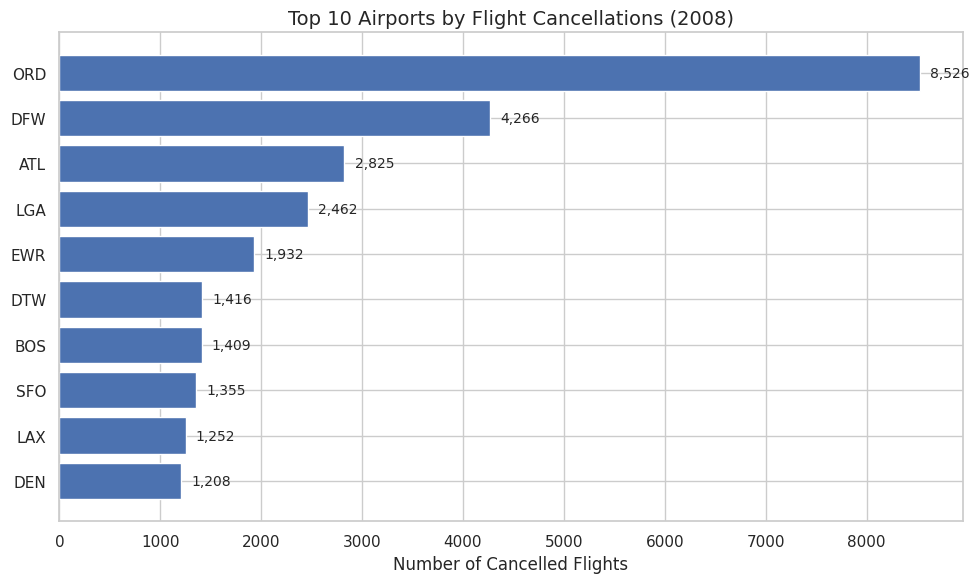

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


#create data frame
airports=['ORD','DFW','ATL','LGA','EWR','DTW','BOS','SFO','LAX','DEN']
TotalCancelled = [8526, 4266, 2825, 2462, 1932, 1416, 1409, 1355, 1252, 1208]

plt.figure(figsize=(10,6))
bars=plt.barh(airports,TotalCancelled)
plt.xlabel('Number of Cancelled Flights')
plt.title('Top 10 Airports by Flight Cancellations (2008)',fontsize=14)

#add value labels
for bar in bars:
    width=bar.get_width()
    plt.text(width+100, bar.get_y()+bar.get_height()/2,f'{width:,}',va='center',
             fontsize=10)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


ORD which is in Chicago (https://wgntv.com/news/chicago-news/why-is-chicagos-ohare-airport-code-ord/), experienced the highest number of cancellations, which could be due to its role as a major hub and weather sensitivity (https://www.airfarewatchdog.com/blog/50066526/airline-hub-guide-which-u-s-cities-are-major-hubs-and-why-it-matters/). This is more than double of the second highest which is DFW airport. Besides, we can see more major hubs dominating the list like DFW and ATL. This may be because they handle large volume of connecting flights, increasing the risk of cancellations due to knock-on effects. Northeastern airports like LGA, EWR and BOS, show relatively high cancellations which could be due to weather volatility, airspace congestion in the New York City area (https://weather.com/travel/news/2024-11-20-americas-worst-weather-airports).Western like SFO, and LAX and midwestern airport like DTW, experience notable cancellations which shows a nationwide spread of operational challenges. The data underscores the importance of efficient scheduling and contingency planning in large, high-traffic airports.

* Time Periods and Cancellation

In [ ]:
SELECT Month, COUNT(*) AS cancelled_flights
FROM airline_2008_deduplicated
WHERE Cancelled = 1
GROUP BY Month
ORDER BY Month;

In [ ]:
1	17308
2	20596
3	16183
4	10355

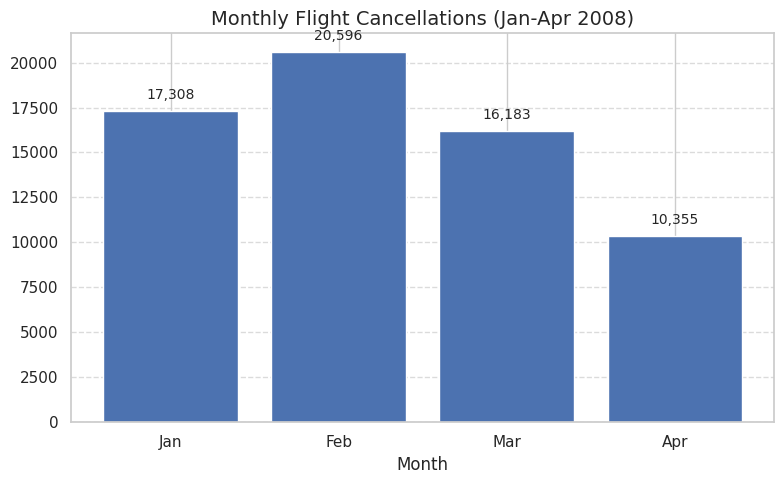

In [ ]:
import matplotlib.pyplot as plt


#create data frame
months=['Jan','Feb','Mar','Apr']
TotalCancelled = [17308, 20596, 16183, 10355]

plt.figure(figsize=(8,5))
bars=plt.bar(months,TotalCancelled)
plt.xlabel('Month')
plt.title('Monthly Flight Cancellations (Jan-Apr 2008)',fontsize=14)

#add value labels
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+500,
             f'{bar.get_height():,}',ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Based on the Hive analysis and visualization above, it's evident that February had the highest number of cancellations among the first four months. This would possibly be due to the winter storms, snow and shorter month with concentrated schedules. April had the lowest cancellations, possibly due to a more stable spring weather. We can see that there's more cancellations during the winter month, showing that a weather related pattern is beginning to emerge.

Based on the above analysis, there is clear evidence that flight cancellations correlate strongly with specific airlines like AA, MQ and OO which are particularly large or regional carriers, specific airports especially busy ones like ORD, DFW and ATL, and specific time periods like winter months which are January and February showing a spike in cancellations, most likely due to weather. This validates the hypothesis that operational scale, weather and hub congestion influence cancellation rates.

#Question 4 - Problematic Routes

Here, I am analysing the specific routes, airlines and flight numbers with poor performance in the aspect of cancellations and delays. I would also be exploring the possible reasons these situation.  

In [ ]:
SELECT Origin, Dest, COUNT(*) AS total_flights,
       SUM(CASE WHEN ArrDelay > 15 THEN 1 ELSE 0 END) AS delayed_flights,
       SUM(CASE WHEN Cancelled = 1 THEN 1 ELSE 0 END) AS cancelled_flights
FROM airline_2008_deduplicated
GROUP BY Origin, Dest
HAVING delayed_flights > 100 AND cancelled_flights > 10
ORDER BY delayed_flights DESC
LIMIT 10;

In [ ]:
ORD	LGA	3580	1480	430
LGA	ORD	3577	1392	444
LAX	SFO	4557	1263	213
ATL	LGA	3676	1245	182
SFO	LAX	4686	1139	217
LGA	ATL	3666	1077	194
LAS	LAX	4054	1043	80
MSP	ORD	3039	974	180
ORD	DFW	2721	963	224
ORD	EWR	2372	956	221

The first column in the Hive analysis above represents the origin, second column the destination, third column total number of flights and 4th and 5th columns represent the total number of delayed and cancelled flights respectively.

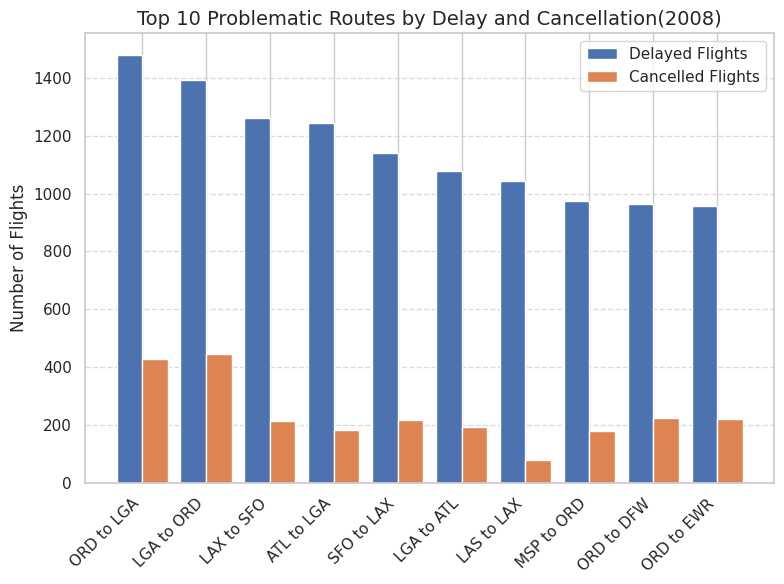

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
  'Origin':['ORD', 'LGA', 'LAX', 'ATL', 'SFO', 'LGA', 'LAS', 'MSP', 'ORD', 'ORD'],
  'Dest':['LGA', 'ORD', 'SFO', 'LGA', 'LAX', 'ATL', 'LAX', 'ORD', 'DFW', 'EWR'],
  'TotalFlights':[3580, 3577, 4557, 3676, 4686, 3666, 4054, 3039, 2721, 2372],
  'DelayedFlights':[1480, 1392, 1263, 1245, 1139, 1077, 1043, 974, 963, 956],
  'CancelledFlights':[430, 444, 213, 182, 217, 194, 80, 180, 224, 221]
}

df=pd.DataFrame(data)

df['Route']=df['Origin']+' to '+df['Dest']
df=df.sort_values(by='DelayedFlights',ascending=False)

plt.figure(figsize=(8,6))
bar_width=0.4
X=range(len(df))

plt.bar(X,df['DelayedFlights'],width=bar_width,label='Delayed Flights')
plt.bar([i+bar_width for i in X],df['CancelledFlights'],width=bar_width,
        label='Cancelled Flights')

#route labels
plt.xticks([i+bar_width/2 for i in X], df['Route'],rotation=45,ha='right')
plt.title('Top 10 Problematic Routes by Delay and Cancellation(2008)',fontsize=14)
plt.ylabel('Number of Flights')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--',alpha=0.7)

plt.show()

Based on the above Hive analysis and Python visualization, it's evident that there are some consistently problematic routes in 2008. The ORD to LGA and vice versa route, both have more than 1400 delayed flights and more than 400 cancellations. This indicates operational inefficiency, possibly due to congested airspace and weather conditions at major airports. The similar situation happens to LAX to SFO and vice versa route recording high delays which are more than 1000 which could be due to frequent short haul scheduling saturation of air traffic as this route marks as one of the nation's busies route. (https://aviationa2z.com/index.php/2025/03/18/top-10-busiest-us-airline-routes-in-march-2025/). Other routes like ATL to LGA and vice versa also shows significant number of delays and cancellations showing that these are heavily trafficked business routes. Some of the factors contributing to these are airport congestion, hub-related dependencies, and seasonal weather disruptions. These issues clearly highlight the importance of capacity planning and effective schedule planning, mainly at major hubs.

In [ ]:
SELECT UniqueCarrier, Origin, Dest, COUNT(*) AS total_flights,
       AVG(ArrDelay) AS avg_arrival_delay,
       SUM(CASE WHEN Cancelled = 1 THEN 1 ELSE 0 END) AS cancellations
FROM airline_2008_deduplicated
GROUP BY UniqueCarrier, Origin, Dest
HAVING avg_arrival_delay > 30
ORDER BY avg_arrival_delay DESC
LIMIT 10;

In [ ]:
OH	SBN	CVG	1	506.0	0
OH	STL	OMA	1	275.0	0
XE	ONT	SAN	2	257.0	1
OH	AUS	DFW	1	255.0	0
OO	ATW	DSM	1	210.0	0
OO	ORF	BOI	1	180.0	0
OH	MCO	LGA	1	150.0	0
OH	IAD	DCA	1	135.0	0
OH	CHA	ATL	2	135.0	0
OH	IND	PIT	1	130.0	0

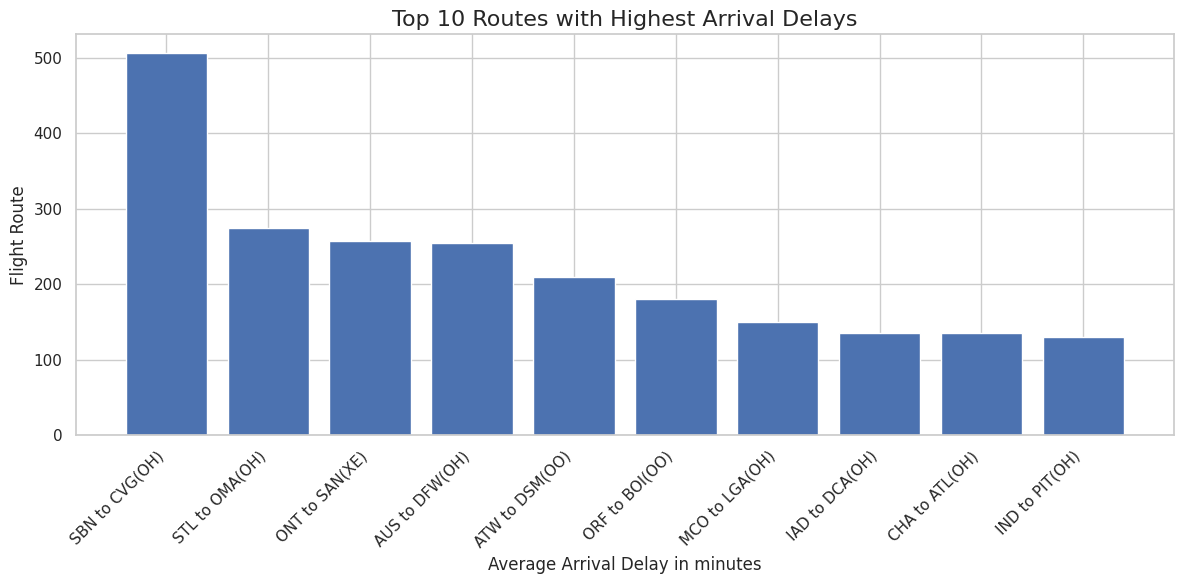

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data={
    'UniqueCarrier':['OH', 'OH', 'XE', 'OH', 'OO', 'OO', 'OH', 'OH', 'OH', 'OH'],
    'Origin':['SBN','STL','ONT','AUS','ATW','ORF','MCO','IAD','CHA','IND'],
    'Dest':['CVG','OMA','SAN','DFW','DSM','BOI','LGA','DCA','ATL','PIT'],
    'FlightCount':[1,1,2,1,1,1,1,1,2,1],
    'AvgDelay':[506, 275, 257, 255, 210, 180, 150, 135, 135, 130],
    'Cancellations':[0,0,1,0,0,0,0,0,0,0]
}
df=pd.DataFrame(data)
df['Route']=df['Origin']+' to '+df['Dest']+'('+df['UniqueCarrier']+')'
df=df.sort_values(by='AvgDelay',ascending=False)

for i,v in enumerate(df['AvgDelay']):
  plt.text(v+5, i, f'{v:.1f}', va='center',fontsize=9)

#plot
plt.figure(figsize=(12,6))
bars=plt.bar(df['Route'],df['AvgDelay'])
plt.xlabel("Average Arrival Delay in minutes")
plt.ylabel("Flight Route")
plt.title("Top 10 Routes with Highest Arrival Delays", fontsize=16)
plt.xticks(rotation=45,ha='right')

plt.tight_layout()
plt.show()


Hive analysis above reveals the top 10 carrier-route combinations with the highest average arrival delays which are all greater than 30 minutes. These results point to significant operational issues on certain flights with lesser frequency. It's also evident that some routes by OH (Comair) like SBN-CVG and STL-OMA exhibit extreme average delays exceeding 250 minutes, although it's only 1 flight each in the dataset. This suggests the results could be skewed due to the extreme delays and it may not be systemic performance issues. Other carriers like XE (ExpressJet Airlines) and OO(SkyWest Airlines), record delay averages in the range of 180 to 257 minutes, again on routes with only one or two recorded flights. Most of these flights did not have cancellations, except for one of the XE flights, showing that the flights took off but arrived significantly late. The above findings may not provide a clear interpretation on the airline reliability as there are only very few flights for the routes mentioned above. For a better analysis, i have also filter out routes with fewer than 10 flights to focus on consistently underperforming services.

In [ ]:
SELECT UniqueCarrier, Origin, Dest, COUNT(*) AS total_flights,
       AVG(ArrDelay) AS avg_arrival_delay,
       SUM(CASE WHEN Cancelled = 1 THEN 1 ELSE 0 END) AS cancellations
FROM airline_2008_deduplicated
GROUP BY UniqueCarrier, Origin, Dest
HAVING total_flights > 10 AND avg_arrival_delay > 30
ORDER BY avg_arrival_delay DESC
LIMIT 10;

In [ ]:
OO	ORD	DEN	19	91.0	0
YV	MCI	ORD	38	82.28125	6
AA	EGE	MIA	37	80.63636363636364	1
UA	SEA	HNL	17	79.70588235294117	0
DL	STT	JFK	17	77.88235294117646	0
MQ	MKE	MQT	112	67.62745098039215	9
AA	HDN	ORD	97	67.30434782608695	5
YV	BHM	ORD	128	65.21739130434783	13
YV	TVC	ORD	75	61.25454545454546	20
MQ	MIA	CLE	17	58.46666666666667	2

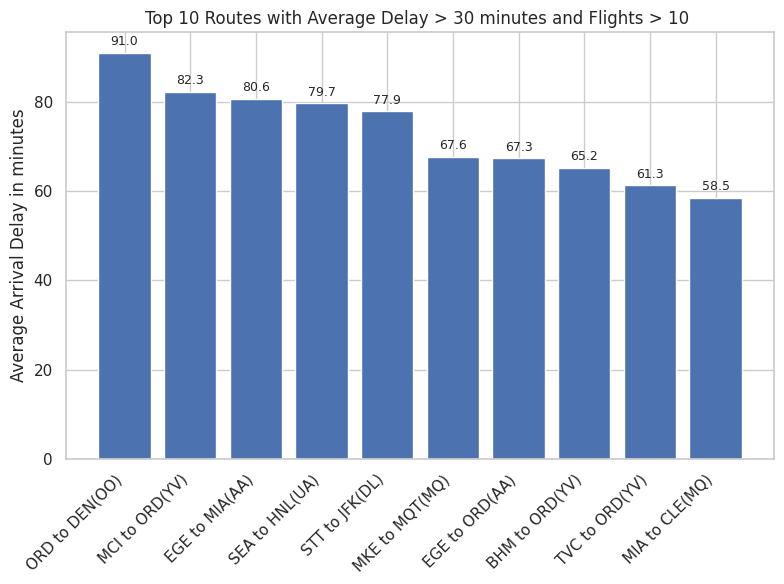

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data={
    'UniqueCarrier':['OO','YV','AA','UA','DL','MQ','AA','YV','YV','MQ'],
    'Origin':['ORD','MCI','EGE','SEA','STT','MKE','EGE','BHM','TVC','MIA'],
    'Dest':['DEN','ORD','MIA','HNL','JFK','MQT','ORD','ORD','ORD','CLE'],
    'FlightCount':[19,38,37,17,17,112,97,128,75,17],
    'AvgDelay':[91.0,82.28125,80.63636363636364,79.70588235294117,77.88235294117646,
                67.62745098039215, 67.30434782608695, 65.21739130434783,
                61.25454545454546, 58.46666666666667],
    'Cancellations':[0,6,1,0,0,9,5,13,20,2]
}
df=pd.DataFrame(data)
df['Route']=df['Origin']+' to '+df['Dest']+'('+df['UniqueCarrier']+')'
df=df.sort_values(by='AvgDelay',ascending=False)

#plot
plt.figure(figsize=(8,6))
bars=plt.bar(df['Route'],df['AvgDelay'])
plt.xticks(rotation=45,ha='right')
plt.ylabel("Average Arrival Delay in minutes")
plt.title("Top 10 Routes with Average Delay > 30 minutes and Flights > 10 ")

for bar in bars:
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+1,
           f'{bar.get_height():.1f}',ha='center',va='bottom',fontsize=9)


plt.tight_layout()
plt.show()

From the above, it's more clear that the routes like ORD to DEN and MCI to ORD, have exceptionally high average delays greater than 80 minutes, but still better than earlier analysis of 250 minutes of delay. YV, which appears 3 times with routes to ORD, is the most problematic carrier in this list because there are significant number of cancellations up to 20. ORD's outdated runway design causes taxi delays and Chicago's snow days, fog days and thunderstorm days annually lead to operational disruptions frequently (https://www.airclaimexperts.com/flight-delays-heathrow-airport-and-others/), (https://en.wikipedia.org/wiki/O%27Hare_International_Airport) .Despite a moderate number of flights, ranging from 17 to 128, these delays are persistent due to common issues like poor scheduling, high congestion or weather-prone locations.

In [ ]:
SELECT UniqueCarrier, Origin, Dest, COUNT(*) AS total_flights,
       AVG(ArrDelay) AS avg_arrival_delay,
       SUM(CASE WHEN Cancelled = 1 THEN 1 ELSE 0 END) AS cancellations
FROM airline_2008_deduplicated
GROUP BY UniqueCarrier, Origin, Dest
HAVING avg_arrival_delay > 30
ORDER BY avg_arrival_delay DESC
LIMIT 10;

In [ ]:
7487	YV	1	347.0	0
3408	MQ	1	266.0	0
1735	AA	3	264.0	0
5897	9E	7	237.0	4
1738	WN	1	210.0	0
2067	WN	2	180.0	0
283	  CO	3	172.0	0
4986	OH	1	160.0	0
6797	OO	2	159.5	0
2344	WN	2	159.0	0

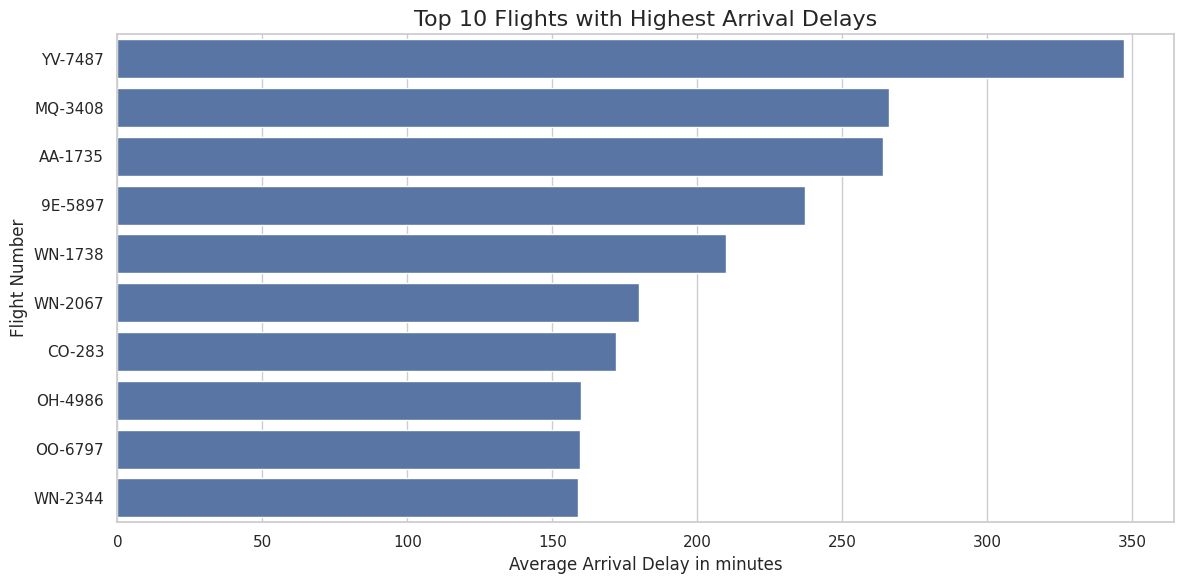

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data={
    'Flightnumber':[7487,3408,1735,5897,1738,2067,283,4986,6797,2344],
    'UniqueCarrier':['YV','MQ','AA','9E','WN','WN','CO','OH','OO','WN'],
    'TotalFlights':[1,1,3,7,1,2,3,1,2,2],
    'Avgdelay':[347.0,266.0,264.0,237.0,210.0,180.0,172.0,160.0,159.5,159.0],
    'Cancelled':[0,0,0,4,0,0,0,0,0,0]
}
df=pd.DataFrame(data)
df=df.sort_values(by='Avgdelay',ascending=False)
df['Flightlabel']=df['UniqueCarrier']+'-'+df['Flightnumber'].astype(str)

for i,v in enumerate(df['Avgdelay']):
  plt.text(v+5, i, f'{v:.1f} min', va='center')

#plot
plt.figure(figsize=(12,6))
sns.barplot(x='Avgdelay',y='Flightlabel',data=df,orient='h')
plt.xlabel("Average Arrival Delay in minutes")
plt.ylabel("Flight Number")
plt.title("Top 10 Flights with Highest Arrival Delays", fontsize=16)

plt.tight_layout()
plt.show()

The above horizontal bar chart shows the top 10 flight numbers with the worst performance in terms of average arrival delay and number of cancellations. It's evident that Flight YV-7487 recorded the highest average delay of almost 350 minutes, although there is only one time this flight has operated for the 4 months in 2008. Besides, MQ-3408 and aa-1735 also shows significantly high delays which is recorded at more than 250 minutes. 9E-5897 with 7 flights in the 4 months recorded an average delay of more than 200 minutes with 4 cancellations, showing that this is the highly delayed and most cancelled flight. WN (Southwest Airlines) have appeared 3 times in the list, each showing delay more than 150 minutes, showing persistent operational challenges on specific routes and could reflect broader carrier-level inefficiencies on some routes.

Therefore, the analysis of flight delays and cancellations shows that there are performance issues across specific routes, carriers and flight numbers. Routes like ORD to LGA, LAX to SFO, and ATL to LGA, are causing consistently high volumes of delays and cancellations which could be due to airport congestion, weather vulnerabilities or even airspace saturation as they are all major hubs. Next, carriers like YV (Mesa Airlines) and MQ(Envoy Air) appear in the list of underperforming services, possibly because they operated out of or into high-traffic airports like ORD, supporting the delay issues. Flight level analysis identifies that flights YV-7487 and 9E-5897 are the ones prone to most delays and cancellations. However, in the analysis of most delays and cancellations for flights with at least more than 10 occurrences, consistent underperformance occurred showing these are not isolated events but could be reflecting operational challenges.

Therefore, some of the ways to improve the performance and avoid delays and cancellation are route optimization at major hubs, carrier-level operational review, weather factors mitigation as well as data-driven scheduling algorithms. This also means that airlines operating in heavily congested airport pairs like ORD to LGA should enhance their scheduling patterns to reduce overlap during peak hours. Besides, carriers like YV, MQ and OH should be investigated further for consistent delays especially when linked to some hubs like ORD. Performance management reviews and staff adequacy audits could be implemented. In addition, for high delay routes that are mainly linked to weather-sensitive regions, weather forecast should be enhanced and buffer time adjustments should be considered. Finally, historical performance data should be used to develop machine learning models to optimize scheduling and routing for future seasons. This analysis provides actionable insights for airline route planners and regulatory authorities. By identifying inefficiencies in system, this data-driven decision-making could improve airline punctuality, passenger satisfaction and most importantly operational costs.